In [1]:
from os.path import join, abspath
from os import pardir, mkdir
from glob import glob
import sys
import numpy as np
import pandas as pd
import vaex
from astropy.table import Table
from astropy.io import fits 

In [2]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import runcmd

In [3]:
name = "APOGEE-2"
root_data_dir = abspath(join(pardir, "Data"))
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")
data_dir

Directory already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/APOGEE-2'

In [6]:
download_link = "https://data.sdss.org/sas/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStar-dr17-synspec_rev1.fits"

runcmd(f"wget --directory-prefix={data_dir} {download_link}", verbose = True)

In [4]:
files = glob(join(data_dir, "*.fits"))
files

['/home2/s20321005/Thesis-Project/Data/APOGEE-2/allStar-dr17-synspec_rev1.fits']

In [6]:
hdul = fits.open(files[0])
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5410 / length of dimension 1                          
NAXIS2  =               733901 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  234 / number of table fields                         
TTYPE1  = 'FILE    '                                                            
TFORM1  = '64A     '                                                            
TTYPE2  = 'APOGEE_ID'                                                           
TFORM2  = '30A     '                                                            
TTYPE3  = 'TARGET_ID'       

In [7]:
data = hdul[1].data
table =Table(data)
table

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,"FPARAM_GRID [21,9]",CHI2_GRID [21],FPARAM [9],"FPARAM_COV [9,9]",ASPCAP_CHI2,PARAM [9],"PARAM_COV [9,9]",PARAMFLAG [9],ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM [27],FELEM_ERR [27],X_H [27],X_H_ERR [27],X_M [27],X_M_ERR [27],ELEM_CHI2 [27],ELEMFRAC [27],ELEMFLAG [27],EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC [27],X_M_SPEC [27],TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK [100]
str64,str30,str58,str71,str77,str6,int32,str20,str30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,str16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,str16,float32,str32,float32,float32,int32,int32,int32,int32,int32,int32,str132,str32,str32,int32,float32,float32,int64,str132,int64,str132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,float32,int64,int64,str256,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,int64,int32,int64,str10,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float3

In [71]:
columns = ["GAIAEDR3_SOURCE_ID","VHELIO_AVG", "VERR", 
           "TEFF", "TEFF_ERR", "LOGG", "LOGG_ERR", "M_H", "M_H_ERR", 
           "ALPHA_M", "ALPHA_M_ERR", "FE_H", "FE_H_ERR"]

columns_name = ["source_id","rv_apogee", "e_rv_apogee", 
           "teff_apogee", "e_teff_apogee", "logg_apogee", "e_logg_apogee", 
           "mh_apogee", "e_mh_apogee", "alpham_apogee", "e_alpham_apogee", 
           "feh_apogee", "e_feh_apogee"]
table_mask = table[columns]
table_mask

GAIAEDR3_SOURCE_ID,VHELIO_AVG,VERR,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,FE_H,FE_H_ERR
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
422596679964513792,-20.43465,0.06299931,6162.0303,41.753815,3.7155607,0.025935415,-0.22151,0.005672638,0.0480663,0.0098556075,-0.21417,0.006151416
4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
421077597267551104,-12.673787,0.02927704,5031.2637,10.145057,3.456132,0.023554068,-0.16008,0.0060127303,0.055704,0.006062756,-0.16028,0.0068899784
2772097619417608704,-12.087924,0.059875343,5945.751,44.2468,4.1231923,0.033373106,-0.26704,0.008147499,0.0124087995,0.012325597,-0.26189,0.008906194
421086363305436800,-101.713486,0.06651952,4974.601,15.310856,2.3882506,0.035517264,-0.51314,0.009835593,0.10715,0.010655452,-0.50953,0.011011918


In [73]:
df = table_mask.to_pandas()
df.columns = columns_name
df_vaex = vaex.from_pandas(df)
df_vaex

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,422596679964513792,-20.43465,0.06299931,6162.0303,41.753815,3.7155607,0.025935415,-0.22151,0.005672638,0.0480663,0.0098556075,-0.21417,0.006151416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"733,896",2341765776376373376,-6.733492,0.0488823,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"733,897",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"733,898",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"733,899",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


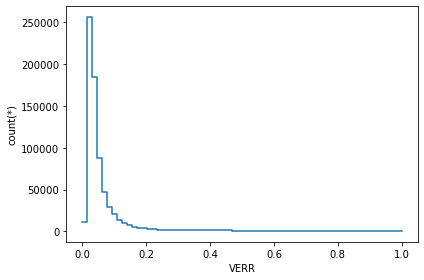

In [13]:
df_vaex.viz.histogram(df_vaex.e_rv_apogee, limits=[0, 1])

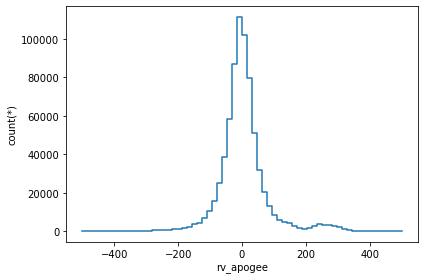

In [74]:
df_vaex.viz.histogram(df_vaex.rv_apogee, limits=[-500, 500])

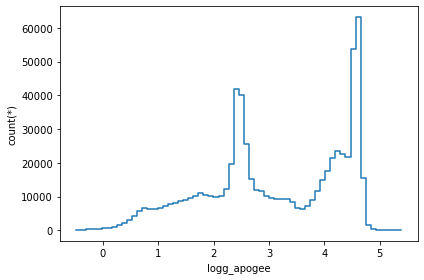

In [75]:
df_vaex.viz.histogram(df_vaex.logg_apogee)

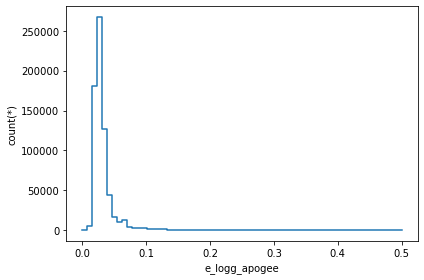

In [76]:
df_vaex.viz.histogram(df_vaex.e_logg_apogee, limits=[0,0.5])

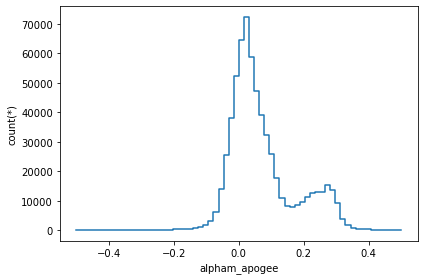

In [77]:
df_vaex.viz.histogram(df_vaex.alpham_apogee, limits=[-0.5,0.5])

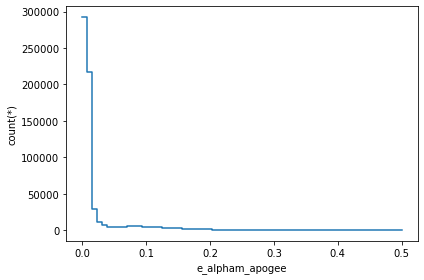

In [78]:
df_vaex.viz.histogram(df_vaex.e_alpham_apogee, limits=[0,0.5])

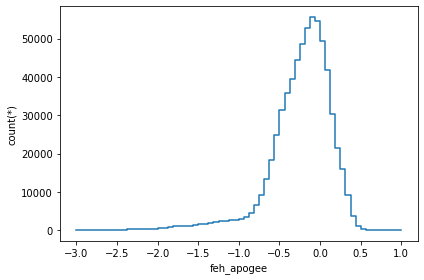

In [79]:
df_vaex.viz.histogram(df_vaex.feh_apogee, limits=[-3,1])

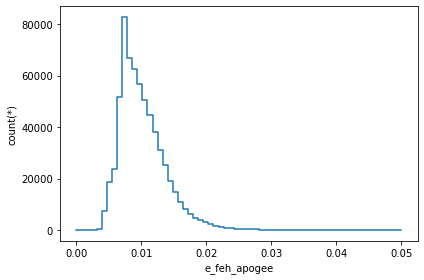

In [80]:
df_vaex.viz.histogram(df_vaex.e_feh_apogee, limits=[0,0.05])

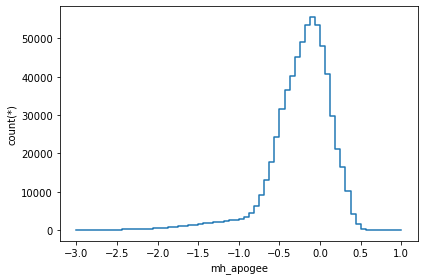

In [81]:
df_vaex.viz.histogram(df_vaex.mh_apogee, limits=[-3,1])

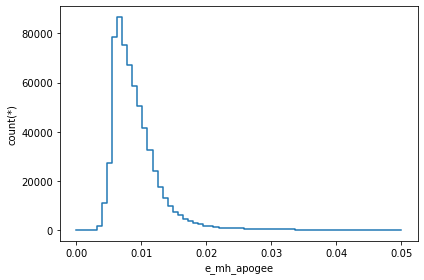

In [82]:
df_vaex.viz.histogram(df_vaex.e_mh_apogee, limits=[0,0.05])

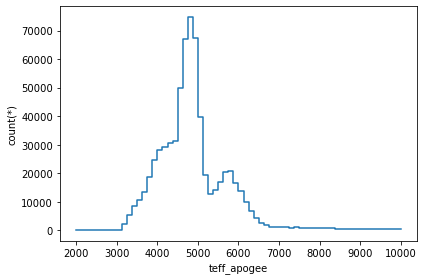

In [83]:
df_vaex.viz.histogram(df_vaex.teff_apogee, limits=[2000,10000])

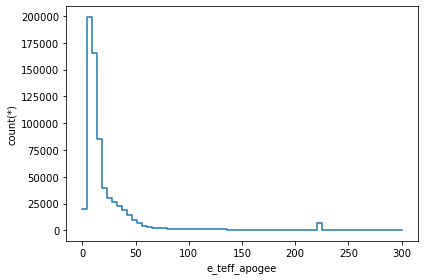

In [84]:
df_vaex.viz.histogram(df_vaex.e_teff_apogee, limits=[0,300])

# Cleaning

In [60]:
df_vaex

#,VHELIO_AVG,VSCATTER,VERR,GAIAEDR3_SOURCE_ID,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,FE_H,FE_H_ERR
0,9.257312,10.185515,0.024030898,0,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,-51.731453,0.20453316,0.020595735,538028216707715712,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,19.073862,0.08796514,0.038598746,2413929812587459072,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,-20.545164,0.13039595,0.065306276,422596679964513792,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,-20.43465,0.16389665,0.06299931,422596679964513792,6162.0303,41.753815,3.7155607,0.025935415,-0.22151,0.005672638,0.0480663,0.0098556075,-0.21417,0.006151416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"733,896",-6.733492,13.719044,0.0488823,2341765776376373376,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"733,897",-60.971943,0.053486522,0.02575837,1998097371124974720,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"733,898",-56.44069,0.051411413,0.025619794,1994741318040223232,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"733,899",159.40576,0.39922976,0.32404962,6379914575198998272,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [94]:
# mask outliers
masking = ((df_vaex.rv_apogee > -500)*(df_vaex.rv_apogee < 500)*
           (df_vaex.e_rv_apogee > 0)*(df_vaex.e_rv_apogee < 1)*
           (df_vaex.e_logg_apogee > 0)*(df_vaex.e_logg_apogee < 0.5)*
           (df_vaex.alpham_apogee > -0.5)*(df_vaex.alpham_apogee < 0.5)*
           (df_vaex.e_alpham_apogee > 0)*(df_vaex.e_alpham_apogee < 0.5)*
           (df_vaex.feh_apogee > -3)*(df_vaex.feh_apogee < 1)*
           (df_vaex.e_feh_apogee > 0)*(df_vaex.e_feh_apogee < 0.05)*
           (df_vaex.mh_apogee > -3)*(df_vaex.mh_apogee < 1)*
           (df_vaex.e_mh_apogee > 0)*(df_vaex.e_mh_apogee < 0.05)*
           (df_vaex.teff_apogee > 2000)*(df_vaex.teff_apogee < 10000)*
           (df_vaex.e_teff_apogee > 0)*(df_vaex.e_teff_apogee < 300))
df_filtered = df_vaex[masking]
df_filtered = df_filtered.extract()
df_filtered

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,422596679964513792,-20.43465,0.06299931,6162.0303,41.753815,3.7155607,0.025935415,-0.22151,0.005672638,0.0480663,0.0098556075,-0.21417,0.006151416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"637,411",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"637,412",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"637,413",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"637,414",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [96]:
# remove duplicates, if any
df_pandas = df_filtered.to_pandas_df()
df_pandas.drop_duplicates("source_id", inplace=True)
df = vaex.from_pandas(df_pandas)
df

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"573,728",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"573,729",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"573,730",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"573,731",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [98]:
# convert to hdf5
df.export(join(data_dir, "apogee.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.13s =  0.0m =  0.0h
 